# INTRODUCCIÓN

El presente proyecto es un estudio de mercado de restaurantes en la ciudad de Los Ángeles. Se buscará encontrar las mejores condiciones posibles para emprender un pequeño café regentado por robots. ¿Qué tipo de establecimientos constituyen el mercado restaurantero en LA? ¿Cuál es la proporción de los tipos de restaurantes y de los establecimientos parte de una cadena? ¿Cuál es la distribución del número de asientos de los distintos tipos de establecimientos? 

Consultando datos procedentes de fuentes abiertas sobre restaurantes en LA., se tratará de contestar estás preguntas para crear un informe que se hará llegar al grupo de inversionistas interesados en participar en este emprendimiento.

Presentación: <enlace al almacenamiento en la nube>
[Presentación PDF](https://drive.google.com/file/d/1OyZ9lY2OZjXPJP9a0ZCUuLmMLGvPwR3f/view?usp=sharing)



## DESCRIPCIÓN DE LOS DATOS

**Tabla df_cafe:**

- object_name — nombre del establecimiento
- chain — establecimiento que pertenece a una cadena (TRUE/FALSE)
- object_type — tipo de establecimiento
- address — dirección
- number — número de asientos

# Carga de datasets, importación de librerías y preparación de datos para análisis

## Se importan las librerías

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re

## Se importa archivo

In [4]:
# df_cafe = pd.read_csv(r'C:\Users\DELL\Documents\triplet\sprint10\final\rest_data_us_upd.csv')
df_cafe = pd.read_csv('rest_data_us_upd.csv')


## Exploración de datos

- Se utilizarán métodos **".info()"** y **".head()"** como primera aproximación a la tabla. Conocer cantidad de valores nulos, nombre y número de columnas, así como su *dtype*.
- Según aplique, también se aplicará el método **'.describe()'** para observar la distribución de los datos.

In [5]:
df_cafe.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [6]:
df_cafe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


In [7]:
null = df_cafe[df_cafe['chain'].isnull()]
null

,id,object_name,address,chain,object_type,number
7408,19194,TAQUERIA LOS 3 CARNALES,5000 E WHITTIER BLVD,NaN,Restaurant,14
7523,19309,JAMMIN JIMMY'S PIZZA,1641 FIRESTONE BLVD,NaN,Pizza,1
8648,20434,THE LEXINGTON THEATER,129 E 3RD ST,NaN,Restaurant,35


In [8]:
df_cafe['number'].describe()

count    9651.000000
mean       43.695161
std        47.622874
min         1.000000
25%        14.000000
50%        27.000000
75%        46.000000
max       229.000000
Name: number, dtype: float64

### Observación sobre *.describe()* 

Desgloce de la métrica *asientos*:

1. **Mean (Media): 43.695**
   - El valor promedio de todas las observaciones es aproximadamente 43.7.

2. **Std (Desviación estándar): 47.623**
   - La desviación estándar es 47.6, lo que indica que hay una variabilidad considerable en los datos. Los valores tienden a variar bastante respecto a la media.

3. **Min (Valor mínimo): 1**
   - El valor más bajo en el conjunto de datos es 1.

4. **50% (Mediana): 27**
   - La mediana es 27, lo que significa que la mitad de las observaciones están por debajo de este valor y la otra mitad están por encima. Es una medida de tendencia central que no se ve afectada por valores atípicos.

5. **Max (Valor máximo): 229**
   - El valor más alto en el conjunto de datos es 229.


- **Distribución asimétrica:** Dado que la media (43.7) es mayor que la mediana (27), la distribución parece estar sesgada hacia la derecha. Esto sugiere que hay algunos valores extremadamente altos que están influyendo en la media.
- **Rango amplio:** El rango de los datos es bastante amplio (1 a 229), lo que, junto con una alta desviación estándar, indica una gran variabilidad en los valores.
- **Concentración de datos:** El hecho de que el tercer cuartil sea 46 y la media esté en 43.7 sugiere que la mayoría de los datos se concentran en la mitad inferior del rango (1 a 46), con algunos valores más altos que están extendiendo la cola derecha de la distribución.

En resumen, los datos sobre la cantidad de asientos muestran una distribución con una fuerte variabilidad y una tendencia a valores altos, lo que podría indicar la presencia de algunos valores atípicos que están influyendo en la distribución general.

### ***Observaciones tabla 'df_cafe'***
- Hay 3 valores nulos en la columna *'chain'*.
- Ya que la columna *'chain'* hace referencia a valores True/False, se cambiará su *dtype* de *object* a *bool*. Esto facilitará el análisis y procesamiento de los datos.
- Antes cambiar el *dtype* de la columna *'chain'*, y de determinar qué hacer con los valores nulos, se verificarán si hay valores duplicados. Para ello, también se cambiarán a minúscula todos los valores de las columnas: *'object_name'*, *'address'* y *'object_type'*. Poder este estandard en estos valores nos ayudará a descartar duplicados 'indirectos'.

In [9]:
#duplicados
df_cafe.duplicated().sum()

0

In [10]:
#Cambian valore s de columnas a minúsculas y se corrobora duplicados
df_cafe['object_name'] = df_cafe['object_name'].str.lower()
df_cafe['address'] = df_cafe['address'].str.lower()
df_cafe['object_type'] = df_cafe['object_type'].str.lower()
df_cafe.duplicated().sum()

0

- Ya que son solo 3 valores nulos de 9651 valores en total, se determina eliminarlos.

In [11]:
#Se eliminan duplicados
df_cafe = df_cafe.dropna()

In [12]:
df_cafe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9648 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9648 non-null   int64 
 1   object_name  9648 non-null   object
 2   address      9648 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9648 non-null   object
 5   number       9648 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 527.6+ KB


In [13]:
#Se convierte dtype de columna 'chain' a bool
df_cafe['chain'] = df_cafe['chain'].astype('bool')

# Análisis de datos

### Análisis datos brutos.

- Antes de realizar el siguiente análisis de proporciones, me gustaría desplegar los datos en bruto para poner algo de perspectiva, saber la cantidad de establecimientos que hay, cómo se distribuyen de acuerdo a su tipo y también la cantidad de los que forman parte de una cadena y los que no.

In [14]:
#Conteo por tipo de establecimiento
df_cafe['object_type'].value_counts()

object_type
restaurant    7253
fast food     1066
cafe           435
pizza          319
bar            292
bakery         283
Name: count, dtype: int64

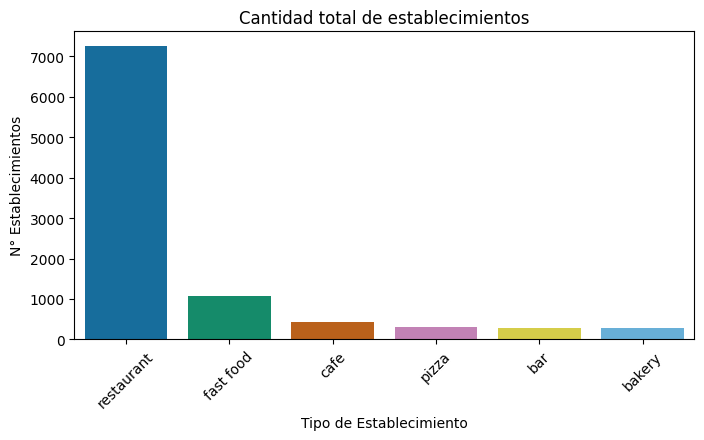

In [15]:
# Contar los valores de object_type
object_type_counts = df_cafe['object_type'].value_counts().reset_index()
object_type_counts.columns = ['object_type', 'count']

# gráfico de barras cantidad de establecimientos 
plt.figure(figsize=(8, 4))
sns.barplot(x='object_type', y='count', hue='object_type', data=object_type_counts, palette='colorblind6')

# Configuración de la gráfica
plt.title('Cantidad total de establecimientos')
plt.xlabel('Tipo de Establecimiento')
plt.ylabel('N° Establecimientos')
plt.xticks(rotation=45)
plt.show()

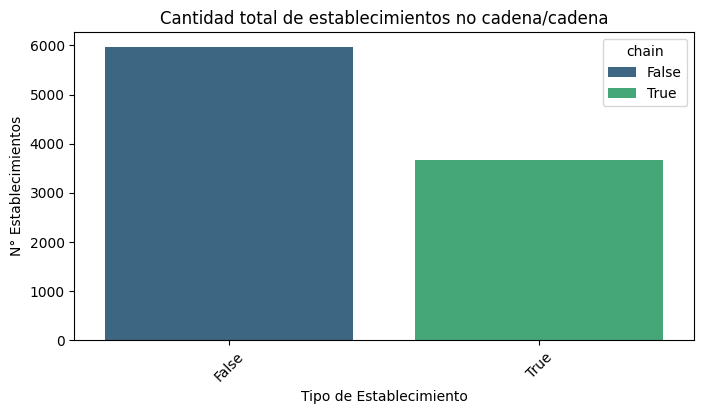

In [16]:
#obtener cantidad de valores True/False en 'chain'

chain_total_counts = df_cafe['chain'].value_counts().reset_index()
chain_total_counts.columns = ['chain', 'count']

# Grafica de barras cantidad de establecimientos de cadena y no cadena
plt.figure(figsize=(8, 4))
sns.barplot(x='chain', y='count', hue='chain', data=chain_total_counts, palette='viridis')

# Configuración de la gráfica
plt.title('Cantidad total de establecimientos no cadena/cadena')
plt.xlabel('Tipo de Establecimiento')
plt.ylabel('N° Establecimientos')
plt.xticks(rotation=45)
plt.show()


In [17]:
#Total establecimientos en relación a 'chain'
chain_total_counts

,chain,count
0,False,5972
1,True,3676


Text(0.5, 1.0, 'Cantidad total de establecimientos por tipo y por su relación con una cadena')

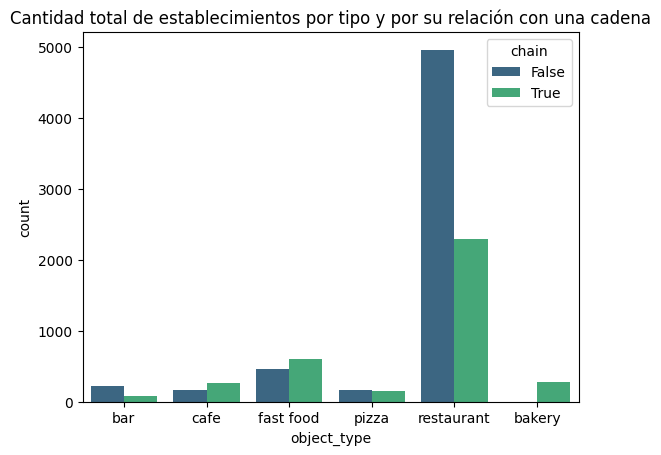

In [18]:
# Agrupar por object_type y chain, y contar los tamaños de los grupos

type_chain_counts = df_cafe.groupby(['chain', 'object_type']).size().reset_index(name='count')
sns.barplot(x='object_type', y='count', hue='chain', data=type_chain_counts, palette='viridis')
plt.title("Cantidad total de establecimientos por tipo y por su relación con una cadena")


In [19]:
type_chain_counts

,chain,object_type,count
0,False,bar,215
1,False,cafe,169
2,False,fast food,461
3,False,pizza,166
4,False,restaurant,4961
5,True,bakery,283
6,True,bar,77
7,True,cafe,266
8,True,fast food,605
9,True,pizza,153


### *PRIMERAS OBSERVACIONES (Datos brutos)*
- Los *restaurantes* (7253) son los establecimientos más abuntantes en L.A. Seguido de los *fast-food* con 1,066 establecimientos.
Abajo, casi con las mismas cantidades *cafe* (435), *pizza* (319), *bar* (292) y *bakery* (283).
- Mayor cantidad total de establecimientos sin relación a una cadena con 5972. Por otra parte hay 3676 establecimientos pertenecen a una cadena.
- Esta última cifra parece estar condicionada por la cantidad de *restaurantes* que no forman parte de una cadena con 4961 establecimientos. Además de los *restaurantes*, *bares* y *pizzerías* son los comercios con mayor cantidad de establecimientos 'independientes' respecto a los que constituyen una franquicia.
- Hay mayor cantidad de *cafes* (266), *bakery* (283) y *fast-food* (605) como parte de una cadena respecto a los que no (169, 0 y 461, respectivamente) 

## Proporciones de los distintos tipos de establecimientos. 


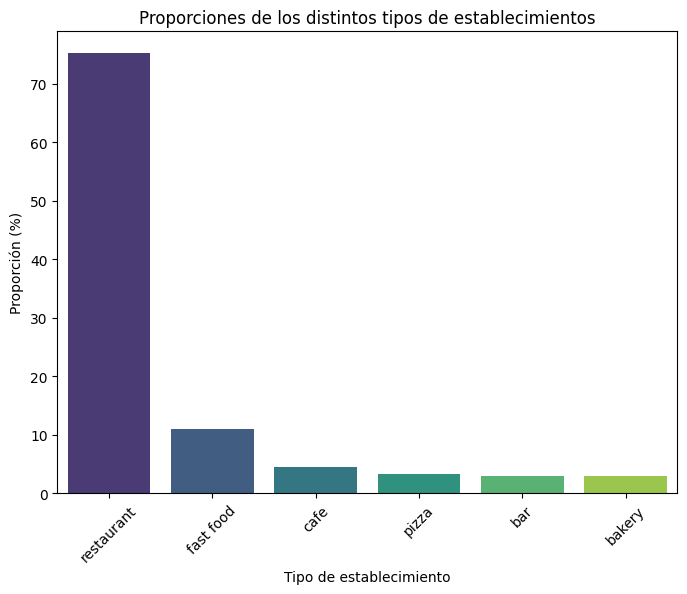

In [20]:
# Calcular las proporciones de los distintos tipos de establecimientos
type_counts = df_cafe['object_type'].value_counts(normalize=True) * 100
type_counts = type_counts.reset_index()
type_counts.columns = ['object_type', 'proportion']

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x='object_type', y='proportion', hue='object_type', data=type_counts, palette='viridis')

# Configurar el gráfico
plt.title('Proporciones de los distintos tipos de establecimientos')
plt.xlabel('Tipo de establecimiento')
plt.ylabel('Proporción (%)')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


In [21]:
type_counts

,object_type,proportion
0,restaurant,75.176202
1,fast food,11.048922
2,cafe,4.508706
3,pizza,3.306385
4,bar,3.026534
5,bakery,2.933250


### ***Observaciones sobre las proporciones de los establecimientos***

- Con un **75%**, gran parte de los establecimientos son *restaurantes*. Parece ser el modelo de venta/consumo de comida en establecimiento predominante en L. A.
- Muy por debajo, los establecimientos *fast-food* se posicionan como 2do en proporción con el **11.04 %**.
- Representando la minoría de establecimientos en L. A.
    * *cafe* con **4.50%**
    * *pizza* con **3.3%**
    * *bar* con el **3.02%**
    * *bakery* con el **2.93%**

## Proporciones de los establecimientos que pertenecen a una cadena y de los que no.


In [22]:
# Calcular las proporciones de establecimientos que están en una cadena y los que no
chain_counts = df_cafe['chain'].value_counts(normalize=True) * 100

chain_proportions = chain_counts.reset_index()
chain_proportions.columns = ['chain', 'proportion']
chain_proportions


,chain,proportion
0,False,61.898839
1,True,38.101161


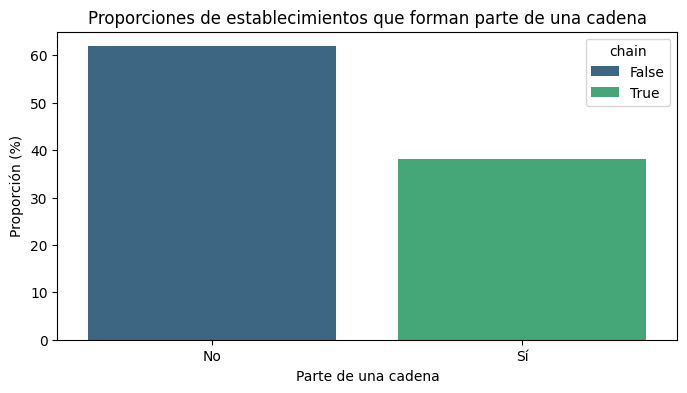

In [23]:

# Crear un gráfico de barras con Seaborn
plt.figure(figsize=(8, 4))
sns.barplot(x='chain', y='proportion', data=chain_proportions, palette='viridis', hue='chain')

# Configurar el gráfico
plt.title('Proporciones de establecimientos que forman parte de una cadena')
plt.xlabel('Parte de una cadena')
plt.ylabel('Proporción (%)')
plt.xticks(ticks=[0, 1], labels=['No', 'Sí'])

# Mostrar el gráfico
plt.show()


### ***Observaciones proporción establecimiento parte de una cadena o no***

- Poco más del **60%** de los establecimientos no forman parte de una cadena. Mientras que el **38%** sí se constituyen como un establecimiento franquicia.
- En términos generales, en conjunto los establecimientos no forman parte de una cadena, pero resulta necesario observar este comportamiento por tipo de establecimiento. 

In [24]:
# Calcular las proporciones de los distintos tipos de establecimientos agrupados por 'chain'
type_counts = df_cafe.groupby(['chain', 'object_type']).size().unstack().fillna(0)
type_proportions = type_counts.div(type_counts.sum(axis=1), axis=0) * 100
type_proportions = type_proportions.stack().reset_index()
type_proportions.columns = ['chain', 'object_type', 'proportion']
type_proportions

,chain,object_type,proportion
0,False,bakery,0.000000
1,False,bar,3.600134
2,False,cafe,2.829873
3,False,fast food,7.719357
4,False,pizza,2.779638
5,False,restaurant,83.070998
6,True,bakery,7.698585
7,True,bar,2.094668
8,True,cafe,7.236126
9,True,fast food,16.458107


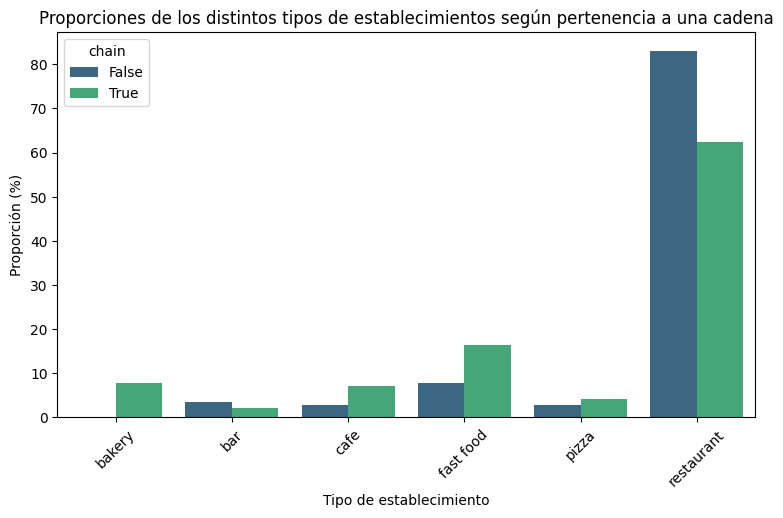

In [25]:

# Crear un gráfico de barras con Seaborn
plt.figure(figsize=(9, 5))
sns.barplot(x='object_type', y='proportion', hue='chain', data=type_proportions, palette='viridis')

# Configurar el gráfico
plt.title('Proporciones de los distintos tipos de establecimientos según pertenencia a una cadena')
plt.xlabel('Tipo de establecimiento')
plt.ylabel('Proporción (%)')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


In [26]:
type_proportions

,chain,object_type,proportion
0,False,bakery,0.000000
1,False,bar,3.600134
2,False,cafe,2.829873
3,False,fast food,7.719357
4,False,pizza,2.779638
5,False,restaurant,83.070998
6,True,bakery,7.698585
7,True,bar,2.094668
8,True,cafe,7.236126
9,True,fast food,16.458107


### **Obervaciones**

- En este caso se está midiendo la proporción de establecimientos que forman parte de una cadena entre la cantidad total de establecimientos que pertenecen a una cadena; así como la proporción de establecimientos que no pertenecen a una cadena respecto al total de establecimientos en la misma condición. 

- Dentro de los establecimientos cadena:
    * Los *restaurantes* y los *fast-food* dominan la proporción con el **62.35%** y el **16.45%**, respectivamente.
    Al parecer son los modelos de servicio de comida más populares de las franquicias para invertir. Son ya muy conocidas las distintas cadenas de restaurantes/comida rápida que abundan en cada una de las grandes ciudades (*Dairy Queen*, *McDonals*, *KFC*, etc.), y seguramente Los Angeles no es la excepción. 
    * En una posición similar se encuentran los establecimientos *bakery* (**7.69%**), *cafe* (**7.23%**) y *pizza* (**4.16%**), los cuales representan la minoría.
    * Al fondo, los *bares* solo cuentan con el **2.09%** de proporción de los establecimientos ligados a una cadena.  


- Establecimientos que no son cadena:
    * Con un **83.07%**, los restaurantes dominan la proporción de establecimientos que no forman parte de una cadena.
    Es común encontrar establecimientos independientes dentro de todos los estractos económicos. Un ejemplo, restaurantes de lujo, que suelen ser de 'autor', donde se busca una distinción en el menú y la experiencia en general respecto a la competencia. 
    * La proporción minoritaria de este tipo de establecimientos lo conforman *fast-food* con **7.71%**; *bares* con **3.60%**; *cafe* y *pizzerías* con el **2.82%** y **2.77%**, respectivamente.

## ¿Qué tipo de establecimiento es habitualmente una cadena?


In [27]:
# Se realiza agrupación y cálculo de proporción entre tipo de establecimientos y pertenencia a cadena 
total_type_proportions = type_counts.div(type_counts.sum()) * 100
total_type_proportions = total_type_proportions.stack().reset_index()
total_type_proportions.columns = ['chain', 'object_type', 'proportion']


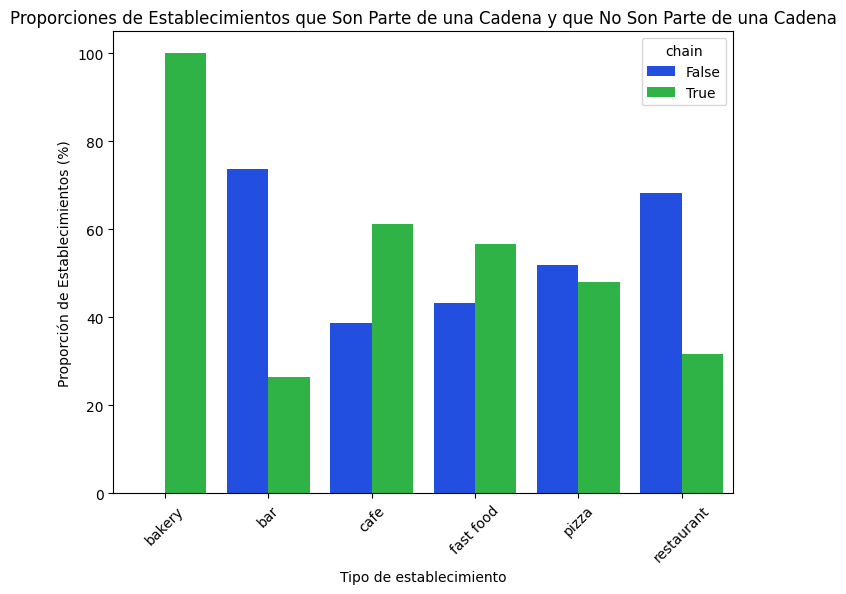

In [28]:
# Crear un gráfico de barras con Seaborn
plt.figure(figsize=(8, 6))
#Grafico de barras 'Proporciones según tipo de establecimiento y pertenencia a una cadena''
sns.barplot(x='object_type', y='proportion', hue='chain', data=total_type_proportions, palette='bright6')

# # Configurar el gráfico
plt.title('Proporciones de Establecimientos que Son Parte de una Cadena y que No Son Parte de una Cadena')
plt.xlabel('Tipo de establecimiento')
plt.ylabel('Proporción de Establecimientos (%)')
plt.xticks(rotation=45)

plt.show()

In [29]:
print("tabla proporciones por establecimiento y relación True/False a cadena")
total_type_proportions

tabla proporciones por establecimiento y relación True/False a cadena


,chain,object_type,proportion
0,False,bakery,0.000000
1,False,bar,73.630137
2,False,cafe,38.850575
3,False,fast food,43.245779
4,False,pizza,52.037618
5,False,restaurant,68.399283
6,True,bakery,100.000000
7,True,bar,26.369863
8,True,cafe,61.149425
9,True,fast food,56.754221


### ***Observaciones sobre establecimientos ue suelen formar parte de una franquicia***


* En este gráfico observamos la proporción por tipo de establecimiento y si forma parte de una cadena o no.

    - El 100% de establecimientos *bakery* forman parte de una cadena porque no hay *bakery* independientes en L.A. 

    - En el caso de los *cafe*, el **61.14%** de los establecimientos forman parte de una cadena, mientras que solo el **38.85%** se mantienen independientes.

    - Los establecimientos donde podemos decir que hay una proporción más competida es con los *fast-food* y las *pizzerías*. Del total de establecimientos *fast-food*, encontramos que el **56.75%** es parte de una cadena, mientras que el **43.24%** no. Por su parte, del total de *pizzerías* en L.A., el **47.96%** pertenecen a una cadena, mientras que el **52.03%** se mantienen independientes.

    - Por parte de los *restaurantes*, podemos decir que aproximadamente 1 de cada 3 establecimientos forman parte de una cadena. El **68.39%** no forma parte de una cadena, por su parte el **31.60%** sí.

    - Los establecimientos que claramente no suelen ser parte de una cadena son los *bares*. El **73.63 %** de los *bares* no forman parte de una cadena.

Podemos concluir que, además de los *bakery* (cuya totalidad es parte de una cadena), los *cafe* con el **61.14 %**, los *fast food* con el **56.75 %**, y las *pizzerías* con el **47.96** son establecimientos que suelen ser parte de una cadena. También podemos incluir a los *restaurantes*, aunque en menor proporción (**31.60%**). 

Hay que considerar que, al igual que con los restaurantes/fast-food, hay diversas cadenas de *cafetería*, *bakery* y *pizzería* que están bien posicionadas en el mercado mundial, por ejemplo *The Chessecake Factory*, *Starbucks* y *Pizza Hut*. Su popularidad y practicidad hacen confiar a inversionistas para seguir reproduciendo este tipo de establecimientos.

También es importante mencionar que la proporción de estos establecimientos que operan de manera independiente no deja de ser considerable.



## ¿Qué caracteriza a las cadenas: muchos establecimientos con un pequeño número de asientos o unos pocos establecimientos con un montón de asientos?


In [30]:
# Separar los datos en dos grupos: cadena y no cadena
chain_true = df_cafe[df_cafe['chain'] == True]
chain_false = df_cafe[df_cafe['chain'] == False]

chain_true_stats = {
    'num_establecimientos': chain_true['object_name'].count(),
    'asientos_promedio': chain_true['number'].mean()
}
chain_false_stats = {
    'num_establecimientos': chain_false['object_name'].count(),
    'asientos_promedio': chain_false['number'].mean()
}

print(f"Establecimientos en cadena (True): {chain_true_stats}")
print(f"Establecimientos fuera de cadena (False): {chain_false_stats}")

Establecimientos en cadena (True): {'num_establecimientos': 3676, 'asientos_promedio': 39.69423286180631}
Establecimientos fuera de cadena (False): {'num_establecimientos': 5972, 'asientos_promedio': 46.17146684527796}


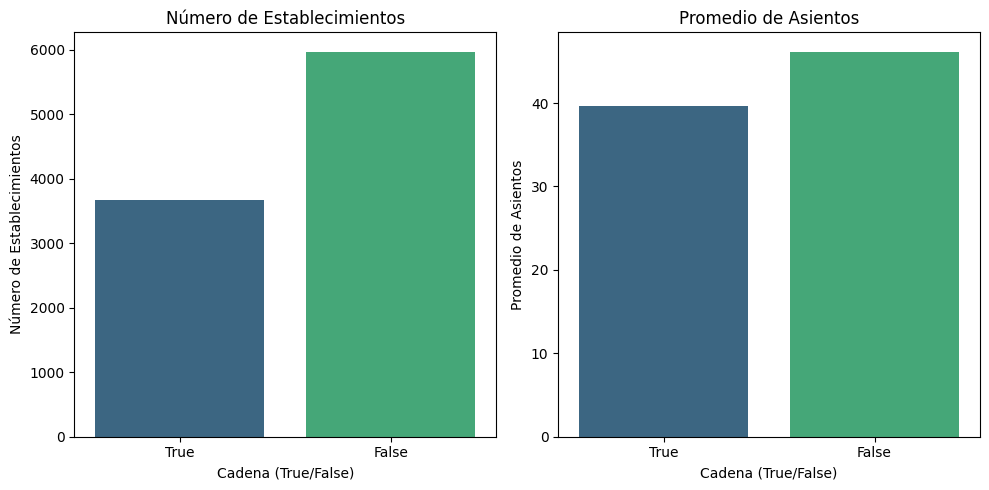

In [31]:
# Calcular la cantidad de establecimientos y el promedio de asientos para cada grupo
num_establishments_true = chain_true['object_name'].count()
average_seats_true = chain_true['number'].mean()

num_establishments_false = chain_false['object_name'].count()
average_seats_false = chain_false['number'].mean()

# Crear DataFrame para los resultados
result_df = pd.DataFrame({
    'chain': ['True', 'False'],
    'num_establishments': [num_establishments_true, num_establishments_false],
    'average_seats': [average_seats_true, average_seats_false]
})

# Crear gráfica de barras para el número de establecimientos
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.barplot(x='chain', y='num_establishments', hue='chain', data=result_df, palette='viridis')
plt.title('Número de Establecimientos')
plt.ylabel('Número de Establecimientos')
plt.xlabel('Cadena (True/False)')

# Crear gráfica de barras para el promedio de asientos
plt.subplot(1, 2, 2)
sns.barplot(x='chain', y='average_seats', hue='chain', data=result_df, palette='viridis')
plt.title('Promedio de Asientos')
plt.ylabel('Promedio de Asientos')
plt.xlabel('Cadena (True/False)')

plt.tight_layout()
plt.show()



Text(0, 0.5, 'N° de asientos')

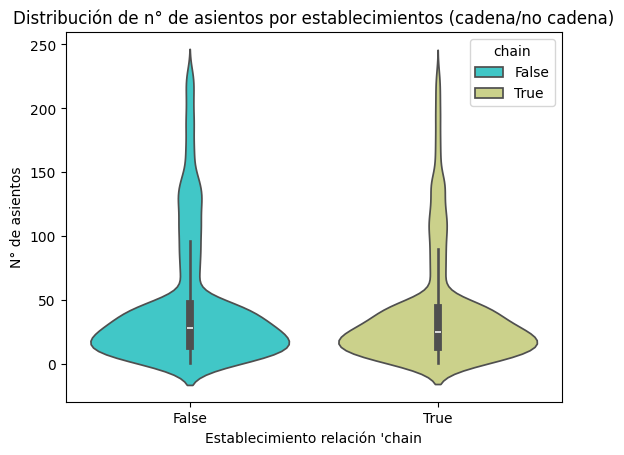

In [32]:
#se crea gráfico violín para observar distribución de cantidad de asientos por establecimiento (cadena/no cadena)
sns.violinplot(x='chain', y='number', data=df_cafe, hue='chain', palette='rainbow')
plt.title("Distribución de n° de asientos por establecimientos (cadena/no cadena)")
plt.xlabel("Establecimiento relación 'chain")
plt.ylabel("N° de asientos")

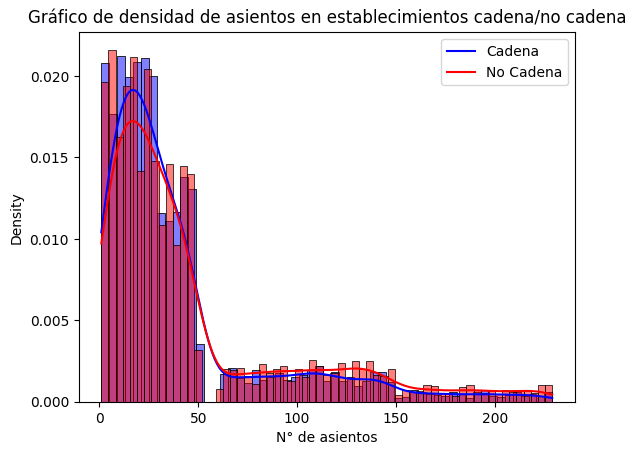

In [33]:
# #Se crean histogramas de densidad (entre establecimientos cadena/no cadena) para comparar distribución 

sns.histplot(chain_true, color='blue', x=chain_true['number'], kde=True, alpha=0.5, legend=True, stat='density')
sns.histplot(chain_false, color='red', x=chain_false['number'], kde=True, alpha=0.5, legend=True, stat='density')
leyenda = ['Cadena', 'No Cadena']

# Añadir leyenda
plt.legend(leyenda)
plt.xlabel('N° de asientos')
plt.title("Gráfico de densidad de asientos en establecimientos cadena/no cadena")
# Mostrar la gráfica
plt.show()

### ***Observaciones característica de cadenas: establecimietos/asientos***

- Podemos observar que, en general, los establecimientos de las cadenas tienden a tener un menor número de asientos en promedio (**39.69%**) comparado con los establecimientos no-cadena (**46.17%**).

- Por otra parte, las cadenas tienen un número significativo de establecimientos (3676), pero no son la mayoría. Representan el **31.5%** del total de establecimientos.

- En el histograma de densidad podemos observar que los establecimientos que no forman parte de una cadena tienen una proporción mayor de establecimientos con 50 o más asientos. Mientras que el área de distribución de entre 1 a 50 asientos es mayor con los establecimientos cadena. Hay que mencionar que este último tipo de establecimiento suele cumplir con algunos estándares, que incluyen un número específico y controlado de asientos (dependiendo del tipo de establecimiento). Es probable que esta sea una de las razones por las cuales es más común observar picos más altos de asientos en establecimientos independientes respecto a los pertenecientes a una cadena.

Por lo tanto, aunque representan minoría respecto a los establecimientos que no son parte de una cadena, se podría concluir que las cadenas suelen tener muchos establecimientos, pero cada uno con un menor número de asientos. Esto puede indicar una estrategia de expansión en la que las cadenas prefieren tener más ubicaciones con una capacidad estándar, posiblemente para llegar a más clientes en diversas ubicaciones geográficas. En contraste, los establecimientos que no son parte de una cadena tienden a tener más asientos, lo que puede indicar una tendencia a operar en espacios más grandes o en ubicaciones que buscan atender a más clientes en un solo lugar.

## Promedio de número de asientos para cada tipo de restaurante. De promedio, ¿qué tipo de restaurante tiene el mayor número de asientos? 

Text(0, 0.5, 'N° de asientos')

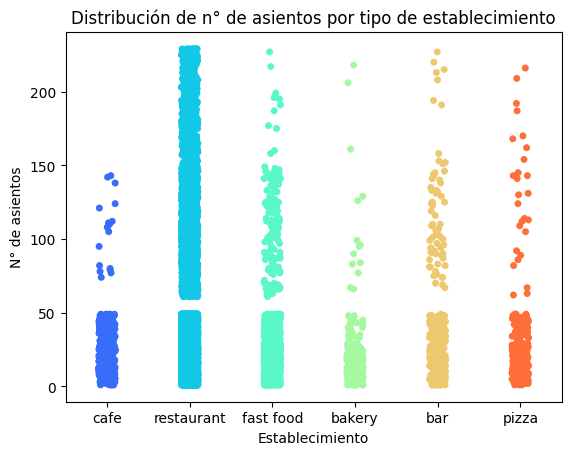

In [34]:
#Se crea gráfico para observar la distribución de la cantidad de asientos por tipo de establecimiento
sns.stripplot(x='object_type', y='number', hue='object_type', data=df_cafe, palette='rainbow')
plt.title("Distribución de n° de asientos por tipo de establecimiento")
plt.xlabel("Establecimiento")
plt.ylabel("N° de asientos")

In [35]:
print("Tabla promedio y mediana general de asientos por tipo de establecimiento")
general_avg = df_cafe.groupby('object_type')['number'].agg(['mean']).reset_index()
general_avg.columns= ['establecimiento', 'promedio']
general_avg['type']= 'General'
general_avg

Tabla promedio y mediana general de asientos por tipo de establecimiento


,establecimiento,promedio,type
0,bakery,21.773852,General
1,bar,44.767123,General
2,cafe,25.000000,General
3,fast food,31.837711,General
4,pizza,28.545455,General
5,restaurant,48.048807,General


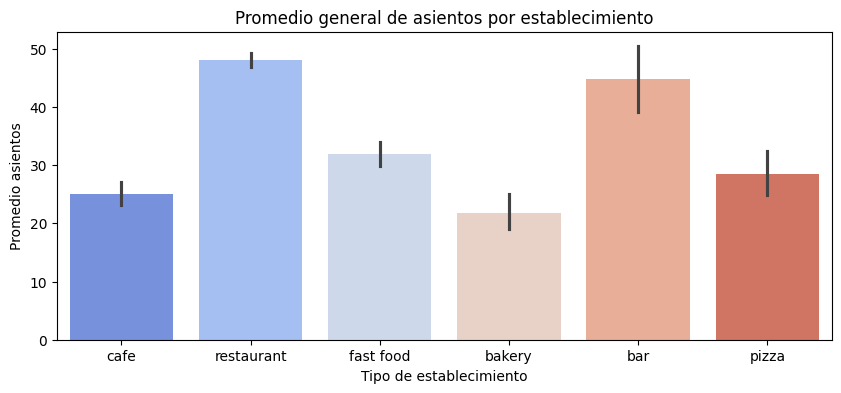

In [36]:
plt.figure(figsize=(10, 4))
# Crear una paleta de colores "coolwarm" con 5 colores (uno para cada categoría)
current_palette = sns.color_palette("coolwarm", 6)

# Crear un gráfico de barras para mostrar promedio de asientos por tipo de establecimiento
sns.barplot(x='object_type', y='number', data=df_cafe, palette=current_palette, hue='object_type', dodge=False, legend=False)

# Añadir títulos y etiquetas
plt.title('Promedio general de asientos por establecimiento')
plt.xlabel('Tipo de establecimiento')
plt.ylabel('Promedio asientos')
# Mostrar la gráfica
plt.show()

In [37]:
print("tabla promedio de asientos establecimientos cadena")
cadena = df_cafe[df_cafe['chain'] == True].groupby('object_type')['number'].mean().reset_index()
cadena.columns= ['establecimiento', 'promedio']
cadena['type'] = 'Cadena'
cadena

tabla promedio de asientos establecimientos cadena


,establecimiento,promedio,type
0,bakery,21.773852,Cadena
1,bar,40.259740,Cadena
2,cafe,25.917293,Cadena
3,fast food,38.089256,Cadena
4,pizza,25.529412,Cadena
5,restaurant,44.856021,Cadena


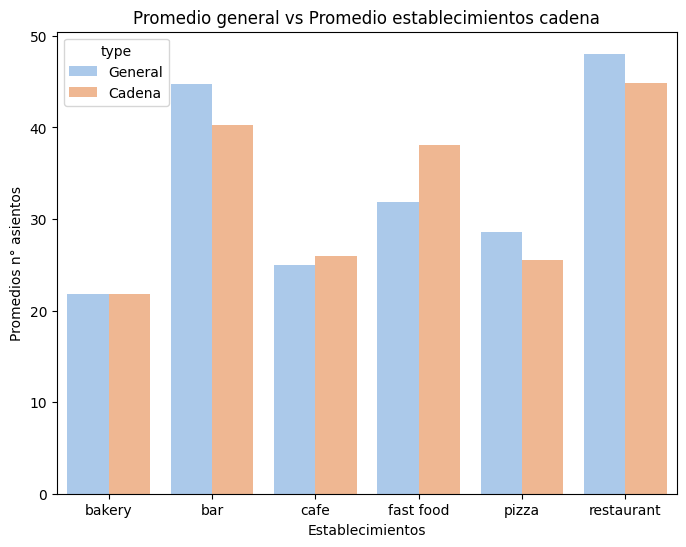

In [38]:
#se crea df para graficar diferencia entre promedios de asientos
df = pd.concat([general_avg, cadena])

# Crear el gráfico de barras comparativo de promedio
plt.figure(figsize=(8, 6))
sns.barplot(x='establecimiento', y='promedio', hue='type', data=df, palette='pastel')

# Agregar etiquetas y título
plt.xlabel('Establecimientos')
plt.ylabel('Promedios n° asientos')
plt.title('Promedio general vs Promedio establecimientos cadena')

# Mostrar el gráfico
plt.show()

In [39]:
print("Tabla de promedio de asientos por tipo de establecimiento y relación chain True/False")
avg = df_cafe.groupby(['object_type', 'chain'])['number'].agg(['mean', 'median']).reset_index()
avg.columns= ['Establecimiento', 'cadena', 'promedio', 'mediana']
avg

Tabla de promedio de asientos por tipo de establecimiento y relación chain True/False


,Establecimiento,cadena,promedio,mediana
0,bakery,True,21.773852,18.0
1,bar,False,46.381395,33.0
2,bar,True,40.259740,21.0
3,cafe,False,23.556213,19.0
4,cafe,True,25.917293,22.0
5,fast food,False,23.633406,19.0
6,fast food,True,38.089256,24.0
7,pizza,False,31.325301,20.5
8,pizza,True,25.529412,16.0
9,restaurant,False,49.523886,29.0


### ***Observaciones promedio de asientos por tipo de establecimiento***

- Definitivamente los *restaurantes* y *bares* son los establecimientos que mayor cantidad de asientos en promedio tienen. A continuación mostramos los promedios generales de asientos por establecimiento:
    * *Restaurant*: **48** asientos.
    * *Bares*: **45** asientos. 
    * *Fast-food*: **32** asientos.
    * *Pizzerías*: **29** asientos.
    * *Cafe*: **25** asientos.
    * *Bakery*: **22** asientos promedio.

- La cantidad promedio de asientos varía ligeramente cuando lo observamos en distinción entre establecimientos de cadena y los que no lo son. En ambos casos, tanto los *restaurantes* como los *bares* siguen siendo los establecimientos con mayor promedio:
    * Parte de una cadena:
        - *Restaurantes* con promedio de **45** asientos.
        - *Bares* con promedio de **40** asientos.
    * No cadena:
        - *Restaurantes* con promedio de **50** asientos.
        - *Bares* con promedio de **46** asientos.
- También podemos ver esta ligera variación entre promedios de asientos en los *cafe* y las *pizzerías*:
    * Parte de una cadena:
        - *Cafe* con promedio de **26** asientos.
        - *Pizzería* con promedio de **26** asientos.
    * No cadena:
        - *Cafe* con promedio de **24** asientos.
        - *Pizerría* con promedio de **31** asientos.  


- Sin embargo, hay una variación interesante en los establecimientos *fast-food* que son parte de una cadena con los que no lo son:
    * Promedio de asientos de *Fast-food* parte de una cadena:
        - **38** asientos, (casi al nivel del promedio de *bares* con (**40**)).
    * Promedio de asientos de *Fast-food* no es parte de una cadena:
        - **24** asientos, (muy por debajo del promedio de los *bares* de**46**, e incluso abajo del promedio de las *pizzerías* con un promedio de **31** asientos.)
    

- En general podemos decir que hay dos variables que determinan el promedio de la cantidad de asientos por establecimiento: 
    1. La naturaleza del establecimiento: *Restaurant* y *bar* son establecimientos donde es común la alta afluencia de clientes, sobretodo en horarios verspertino/nocturno y fines de semana.
    2. Si el establecimiento forma parte de una cadena o no: Hemos observado que cambia la configuración de los *fast-food* si son parte de una franquicia, su promedio de asientos asciende considerablemente respecto a los que no lo son.
    3. Al menos tomando en cuenta la cantidad promedio de asientos, podemos pensar en la probabilidad de un tamaño estandar general de establecimientos como *cafes* y *pizzerías*.

## Coloca los datos de los nombres de las calles de la columna address en una columna separada.


In [40]:
# se crea funcion def para aplicar expresion regular y extraer nombre de calles
def extract_street_name(address):
    # Patrón de expresión regular para eliminar números y otros caracteres no deseados
    pattern = r'^\d+\s*|\s*#?\d*$|\s*\d+$|\b[nswe]\b|\d+\s*$|\b\d+/\d+\b|[\s,]?((a|b|i)\s*$|ste\b)|blvd\b.*?$|st\b.*?$|[\w\d]*-\w*$|[\w\d]*#\w*$'
    
    # Utiliza la expresión regular para eliminar números y caracteres no deseados
    street_name = re.sub(pattern, '', address)
    # Elimina espacios en blanco adicionales
    street_name = street_name.strip()
    return street_name
''


# Crear la nueva columna 'street_name' en el DataFrame
df_cafe['street_name'] = df_cafe['address'].apply(extract_street_name)



In [41]:
df_cafe.head()

,id,object_name,address,chain,object_type,number,street_name
0,11786,habitat coffee shop,3708 n eagle rock blvd,False,cafe,26,eagle rock
1,11787,reilly's,100 world way 120,False,restaurant,9,world way
2,11788,street churros,6801 hollywood blvd 253,False,fast food,20,hollywood
3,11789,triniti echo park,1814 w sunset blvd,False,restaurant,22,sunset
4,11790,pollen,2100 echo park ave,False,restaurant,20,echo park ave


## Número de calles que solo tienen un restaurante.


In [42]:
#Se calcula el número de calles con un solo restaurante
num_single_streets = (df_cafe['street_name']
                                 .value_counts()
                                 .eq(1)
                                 .sum())

print(f"Hay un total de {num_single_streets} calles con un solo establecimiento en L.A.")

Hay un total de 310 calles con un solo establecimiento en L.A.


In [43]:
#Obtener el número de calles donde hay al menos 1 establecimiento
total_streets = df_cafe['street_name'].nunique()
proportion_single_streets = round((num_single_streets / total_streets) * 100)
print(f'El {proportion_single_streets}% representa la proporción de calles con un solo establecimiento respecto al total de calles en L.A., \ncon al menos un establecimiento.')

El 49% representa la proporción de calles con un solo establecimiento respecto al total de calles en L.A., 
con al menos un establecimiento.


In [44]:
#En las siguientes líneas se creará un DF con solo las calles con un establecimiento para observar distribución de asientos
street_counts = df_cafe['street_name'].value_counts()

# Filtrar las calles que tienen exactamente un establecimiento
streets_with_one_establishment = street_counts[street_counts == 1].index

# Filtrar el DataFrame original para mantener solo estas calles
street_df = df_cafe[df_cafe['street_name'].isin(streets_with_one_establishment)]


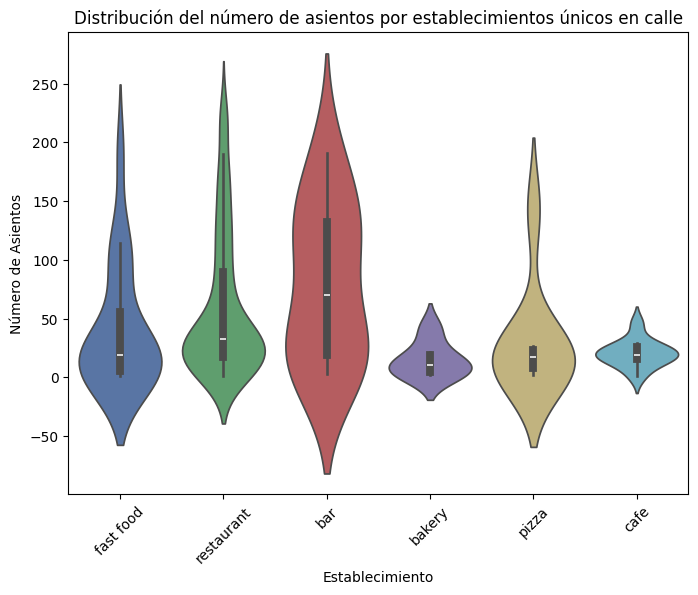

In [45]:
plt.figure(figsize=(8, 6))
#Se crea gráfico utilizando seaborn para observar distribución de asientos en establecimientos ubicados en este tipo de calle
sns.violinplot(x='object_type', y='number', hue='object_type', data=street_df, palette='deep6')
plt.title('Distribución del número de asientos por establecimientos únicos en calle')
plt.xlabel('Establecimiento')
plt.ylabel('Número de Asientos')
plt.xticks(rotation=45)
plt.show()

<Figure size 800x600 with 0 Axes>

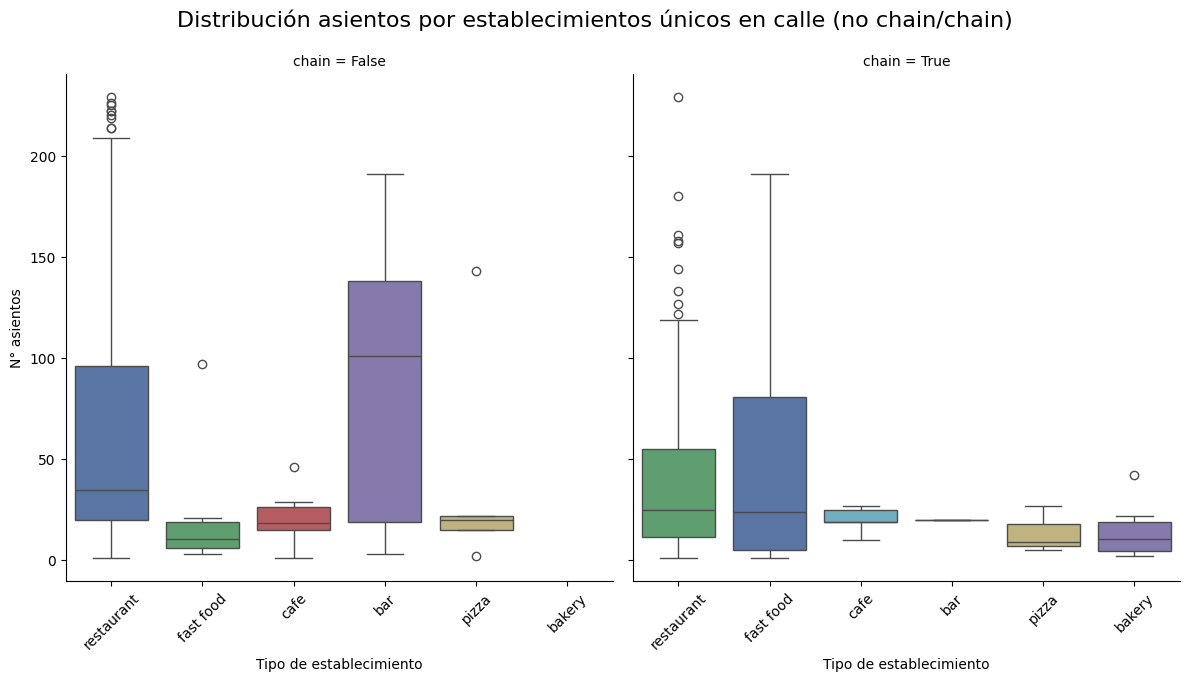

In [46]:
#Se crea gráfico de dispersión de asientos 
plt.figure(figsize=(8, 6))
g = sns.FacetGrid(street_df, col="chain", col_wrap=2, height=6, aspect=1)
g.map_dataframe(sns.boxplot, x='object_type', y='number', hue='object_type', palette='deep6')
g.set_axis_labels('Tipo de establecimiento', 'N° asientos')
g.set_xticklabels(rotation=45)
plt.suptitle('Distribución asientos por establecimientos únicos en calle (no chain/chain)', y=1.05, fontsize=16)
plt.show()

In [47]:
print("Tabla de promedios/mediana de asientos por tipo de establecimiento único en calle")
unico = street_df.groupby(['object_type', 'chain'])['number'].agg(['mean', 'median']).reset_index()
unico.columns=(['establecimiento', 'chain', 'promedio', 'mediana'])
unico

Tabla de promedios/mediana de asientos por tipo de establecimiento único en calle


,establecimiento,chain,promedio,mediana
0,bakery,True,15.000000,10.5
1,bar,False,85.666667,101.0
2,bar,True,20.000000,20.0
3,cafe,False,21.166667,18.5
4,cafe,True,20.000000,19.0
5,fast food,False,24.666667,10.5
6,fast food,True,48.307692,24.0
7,pizza,False,40.400000,20.0
8,pizza,True,13.666667,9.0
9,restaurant,False,64.740331,35.0


### Observación sobre calles con un solo establecimiento.

- Hay 252 calles con un solo establecimiento en L.A. Las cuales representan el 45% de calles con al menos un establecimiento en toda la ciudad. Seguramente son calles que geográficamente se encuentran alrededor del 'downtown'.

* **Dispersión de asientos en establecimientos**

- No hay gran variación en el promedio de asientos de *restaurantes* respecto si son parte de una cadena o no lo son:
    * *Restaurante de cadena:* **54**.
    * *Restaurante no es de cadena:* **57**.

- No es el caso con el resto de los establecimientos (a excepción de *bakery*), donde encontramos una drástica diferencia en el promedio de número de asientos entre establecimientos cadena y los que no lo son:
    * *Bar cadena* **20** - **78** *Bar no cadena*.
    * *Cafe cadena* **22** - **10** *Cafe no cadena*.
    * *Fast-food cadena* **59** - **33** *Fast-food no cadena*.
    * *Pizerría cadena* **9** - **5** *Pizerría no cadena*.

- Si se pretende abrir un establecimiento con una ubicación geográfica similar, y con un rango de espacios para clientes lo más amplio posible, la opción podría ser *Cafe cadena*, *Fast-food cadena* o *Pizerría cadena*. O, por el contrario, un *Bar no cadena*.





## Para las calles con muchos restaurantes, analiza la distribución del número de asientos. ¿Qué tendencias puedes ver?


In [48]:
#Se obtiene el top 10 calles con mayor número de establecimiento
top_streets = df_cafe['street_name'].value_counts().head(10)

# Convertir la Serie en DataFrame para usar seaborn
top_streets_df = top_streets.reset_index()
top_streets_df.columns = ['street_name', 'count']
top_streets_df

,street_name,count
0,sunset,404
1,wilshire,398
2,pico,371
3,western ave,343
4,figueroa,332
5,olympic,309
6,vermont ave,279
7,santa monica,264
8,3rd,260
9,hollywood,254


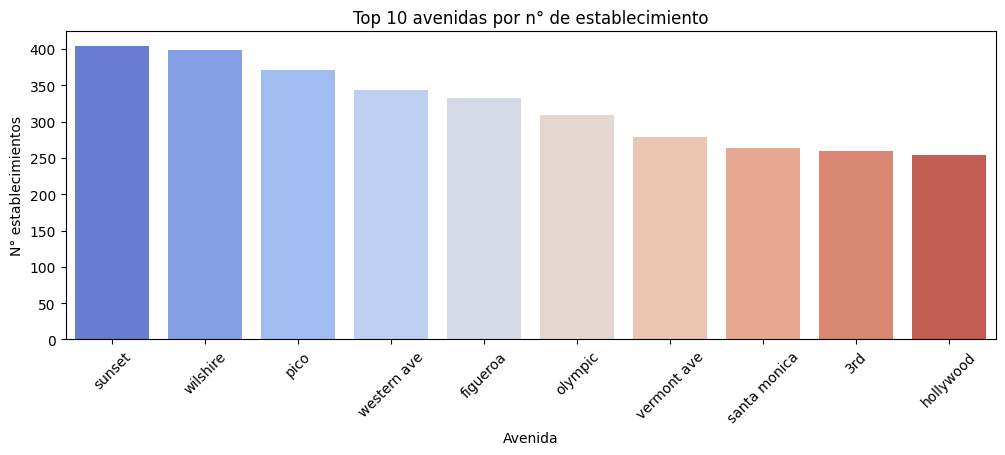

In [49]:
plt.figure(figsize=(12, 4))
# Crear una paleta de colores "coolwarm" con 10 colores (uno para cada categoría)
current_palette = sns.color_palette("coolwarm", 10)

# Crear un gráfico de barras del top 10 calles
sns.barplot(x='street_name', y='count', data=top_streets_df, palette=current_palette, hue='street_name', dodge=False, legend=False)

# Añadir títulos y etiquetas
plt.title('Top 10 avenidas por n° de establecimiento')
plt.xlabel('Avenida')
plt.xticks(rotation=45) 
plt.ylabel('N° establecimientos')
# Mostrar la gráfica
plt.show()

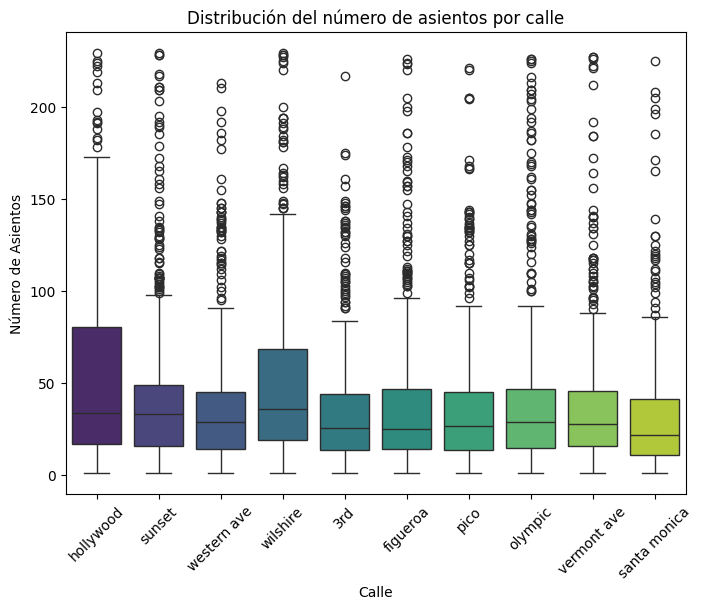

In [50]:
#Filtro máscara para tener el top 10 calles
df_top_streets = df_cafe[df_cafe['street_name'].isin(top_streets_df['street_name'])]
plt.figure(figsize=(8, 6))
#Se crea gráfico de dispersión de asientos por calle top 10
sns.boxplot(x='street_name', y='number', hue='street_name', data=df_top_streets, palette='viridis')
plt.title('Distribución del número de asientos por calle')
plt.xlabel('Calle')
plt.ylabel('Número de Asientos')
plt.xticks(rotation=45)
plt.show()

### Primera observación distribución de asientos por top 10 calles

- A pesar de que la calle *Hollywood blvd* no es top 5 en la cantidad de establecimiento, sí es la que mejor cuerpo tiene en la distribución de asientos por establecimiento. El **50%** de los establecimientos en esta avenida tienen un rango de **20 a 80** asientos, cuando, a excepción de Wilshire blvd, el **50%** del resto de establecimientos del top 10, tienen alrededor de un rango de **15 a 48** asientos.  

<Figure size 1000x600 with 0 Axes>

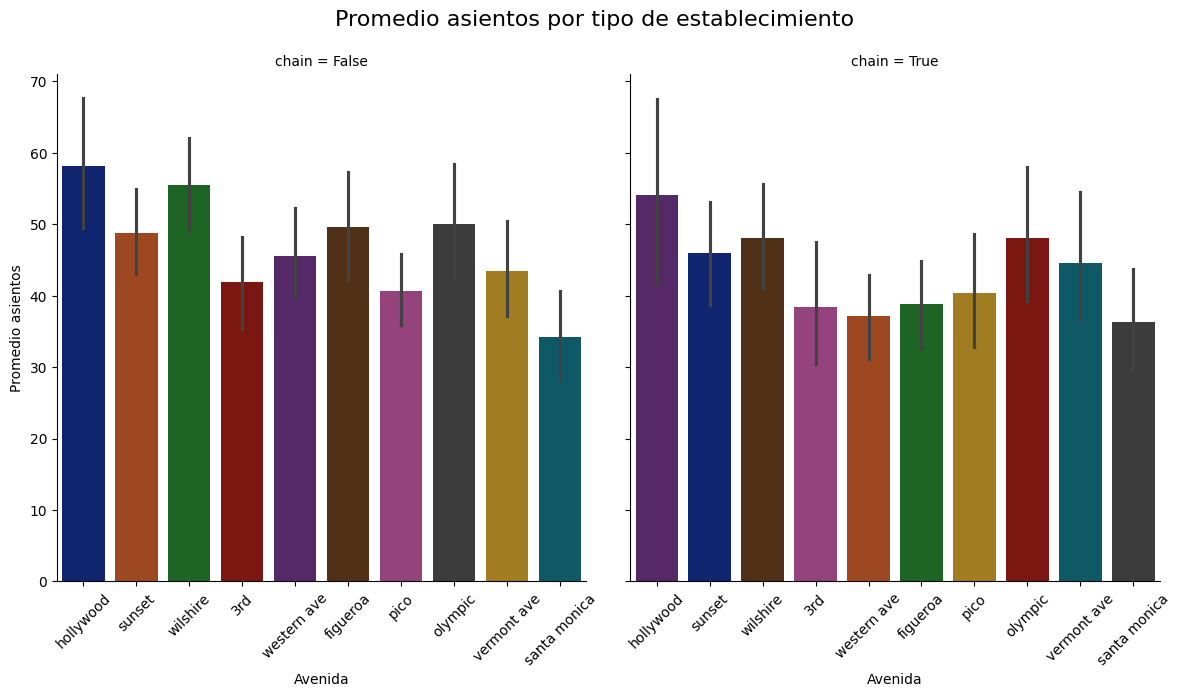

In [51]:
plt.figure(figsize=(10, 6))
#Se crea gráfico para observar promedio de asientos por establecimiento según pertenencia a cadena
g = sns.FacetGrid(df_top_streets, col="chain", col_wrap=2, height=6, aspect=1)
g.map_dataframe(sns.barplot, x='street_name', y='number', hue='street_name', palette='dark')
g.set_axis_labels('Avenida', 'Promedio asientos')
g.set_xticklabels(rotation=45)
plt.suptitle('Promedio asientos por tipo de establecimiento', y=1.05, fontsize=16)
plt.show()

In [52]:
print("Tabla promedio asientos en establecimientos por calle y relación chain True/False")
top_street_ = df_top_streets.groupby(['street_name', 'chain'])['number'].agg(['mean', 'median']).reset_index()
top_street_


Tabla promedio asientos en establecimientos por calle y relación chain True/False


,street_name,chain,mean,median
0,3rd,False,41.928144,27.0
1,3rd,True,38.462366,23.0
2,figueroa,False,49.695187,24.0
3,figueroa,True,38.806897,26.0
4,hollywood,False,58.189349,36.0
5,hollywood,True,54.164706,25.0
6,olympic,False,50.082474,28.0
7,olympic,True,48.086957,32.0
8,pico,False,40.635628,27.0
9,pico,True,40.362903,24.5


<Figure size 1000x600 with 0 Axes>

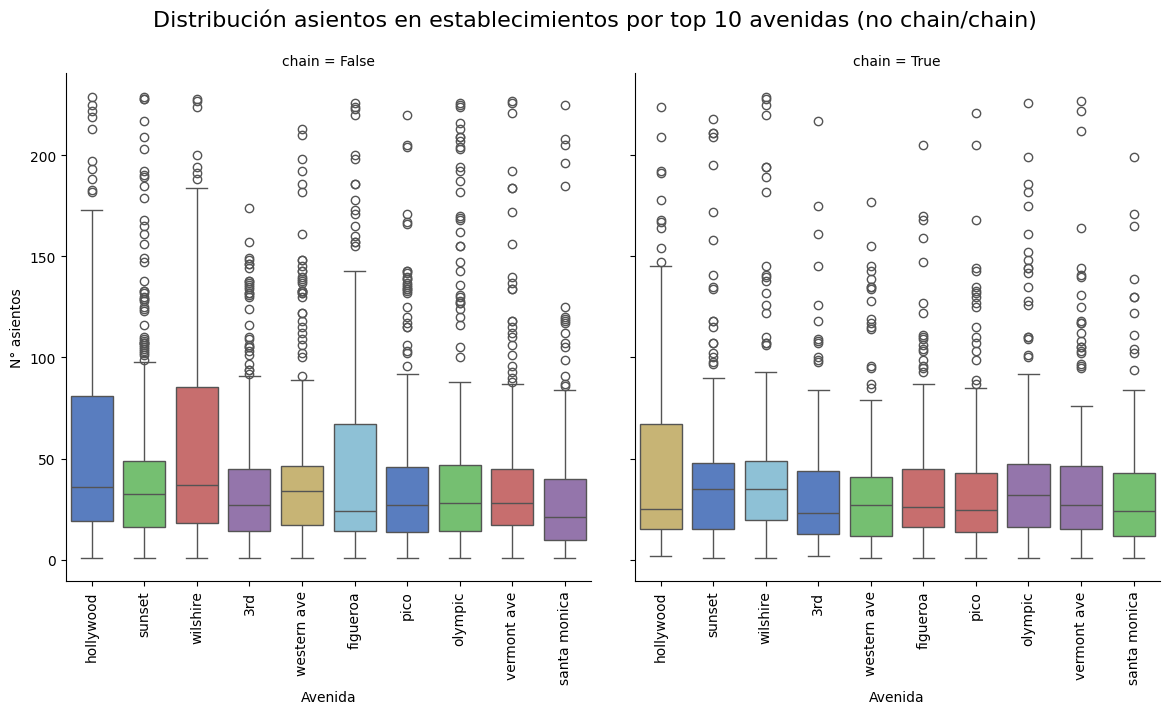

In [53]:
plt.figure(figsize=(10, 6))
#Se crea gráfico para observar promedio de asientos por establecimiento según pertenencia a cadena
g = sns.FacetGrid(df_top_streets, col="chain", col_wrap=2, height=6, aspect=1)
g.map_dataframe(sns.boxplot, x='street_name', y='number', hue='street_name', palette='muted6')
g.set_axis_labels('Avenida', 'N° asientos')
g.set_xticklabels(rotation=90)
plt.suptitle('Distribución asientos en establecimientos por top 10 avenidas (no chain/chain)', y=1.05, fontsize=16)
plt.show()

### 2da observación distribución de asientos en top 10 Av.

- La referencia visual del boxplot nos indica mayor dispersión en la cantidad de asientos en los establecimientos que no son parte de una cadena en las avenidas *wilshire blvd* y *figueroa st*, respecto a la cantidad de asientos en establecimientos que son parte de una cadena que están en las mismas avenidas.
    - Los promedios de cantidad de asientos confirman la situación:
    * figueroa st	- chain/False	**50**
    * figueroa st	- chain/True	**39**
    * wilshire blvd	- chain/False	**56**
    * wilshire blvd	- chain/True	**48**

- Respecto al resto de las avenidas, parece no haber gran diferencia en las distribuciones.


<Figure size 800x600 with 0 Axes>

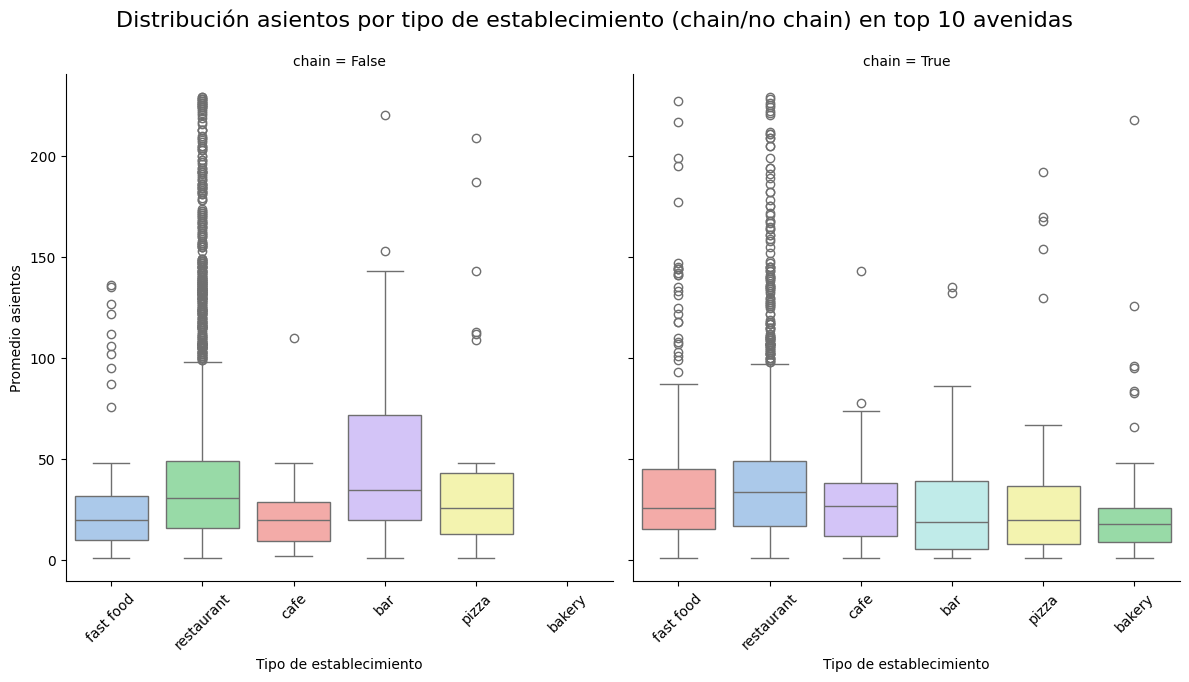

In [54]:
plt.figure(figsize=(8, 6))
#Se crea gráfico para observar distribución de asientos por establecimiento según pertenencia a cadena
g = sns.FacetGrid(df_top_streets, col="chain", col_wrap=2, height=6, aspect=1)
g.map_dataframe(sns.boxplot, x='object_type', y='number', hue='object_type', palette='pastel6')
g.set_axis_labels('Tipo de establecimiento', 'Promedio asientos')
g.set_xticklabels(rotation=45)
plt.suptitle('Distribución asientos por tipo de establecimiento (chain/no chain) en top 10 avenidas', y=1.05, fontsize=16)
plt.show()



<Figure size 1200x600 with 0 Axes>

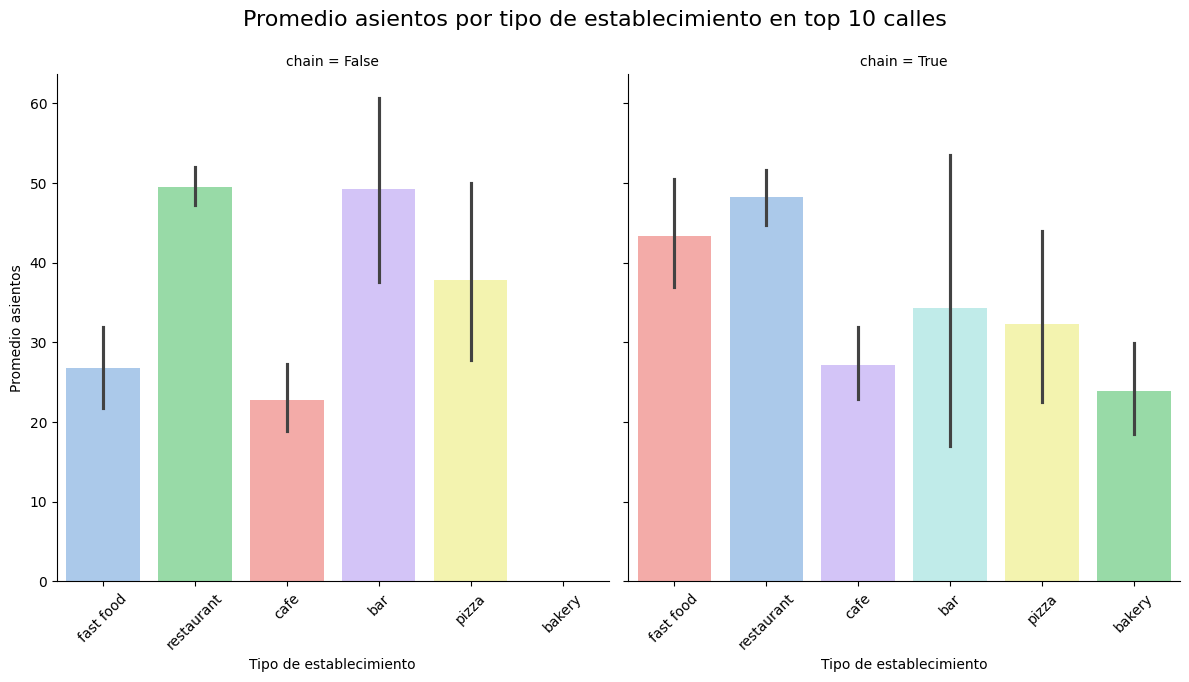

In [55]:
plt.figure(figsize=(12, 6))
#Se crea gráfico para observar promedio de asientos por establecimiento según pertenencia a cadena
g = sns.FacetGrid(df_top_streets, col="chain", col_wrap=2, height=6, aspect=1)
g.map_dataframe(sns.barplot, x='object_type', y='number', hue='object_type', palette='pastel6')
g.set_axis_labels('Tipo de establecimiento', 'Promedio asientos')
g.set_xticklabels(rotation=45)
plt.suptitle('Promedio asientos por tipo de establecimiento en top 10 calles', y=1.05, fontsize=16)
plt.show()

In [56]:
print("Tabla de promedio/mediana de asientos de establecimientos en av top 10")
top = df_top_streets.groupby(['object_type', 'chain'])['number'].agg(['mean', 'median']).reset_index()
top.columns = ['establecimiento', 'cadena', 'promedio', 'mediana']
top


Tabla de promedio/mediana de asientos de establecimientos en av top 10


,establecimiento,cadena,promedio,mediana
0,bakery,True,23.855670,18.0
1,bar,False,49.238095,35.0
2,bar,True,34.315789,19.0
3,cafe,False,22.714286,20.0
4,cafe,True,27.181818,27.0
5,fast food,False,26.760331,20.0
6,fast food,True,43.369318,26.0
7,pizza,False,37.886792,26.0
8,pizza,True,32.349206,20.0
9,restaurant,False,49.564733,31.0


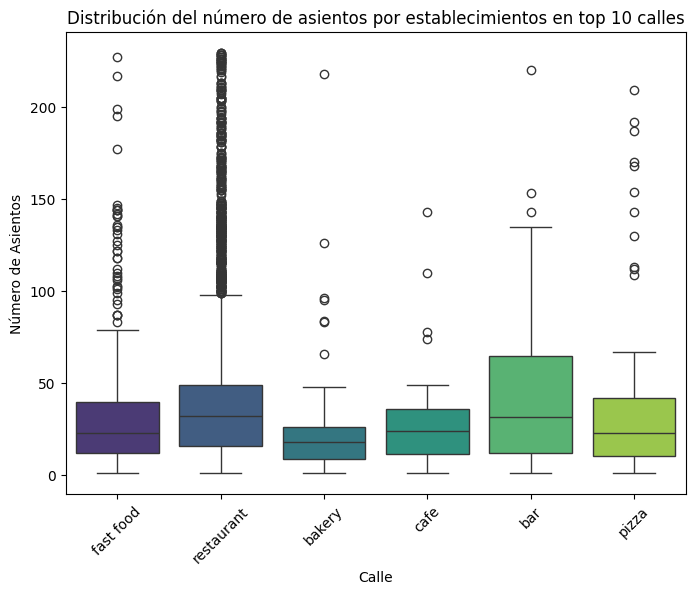

In [57]:
plt.figure(figsize=(8, 6))
#Se crea gráfico para observar la distribución de los asientos en los establecimientos ubicados en el top 10 de av.
sns.boxplot(x='object_type', y='number', hue='object_type', data=df_top_streets, palette='viridis')
plt.title('Distribución del número de asientos por establecimientos en top 10 calles')
plt.xlabel('Calle')
plt.ylabel('Número de Asientos')
plt.xticks(rotation=45)
plt.show()

### Observación distribución de asientos en Av top en L.A

1. Comparación entre establecimientos pertenecientes y no pertenecientes a cadenas:

- Los establecimientos no pertenecientes a cadenas presentan una mayor variabilidad y más valores atípicos, especialmente en restaurantes y bares.
- Los establecimientos pertenecientes a cadenas tienden a tener una distribución de asientos más concentrada y menos dispersa.

2. Tipo de establecimiento:

- Los restaurantes tienen la mayor variabilidad en términos de número de asientos, tanto para los pertenecientes como para los no pertenecientes a cadenas.
- Las cafeterías y panaderías tienden a ser más consistentes en términos de número de asientos, con menos variabilidad.

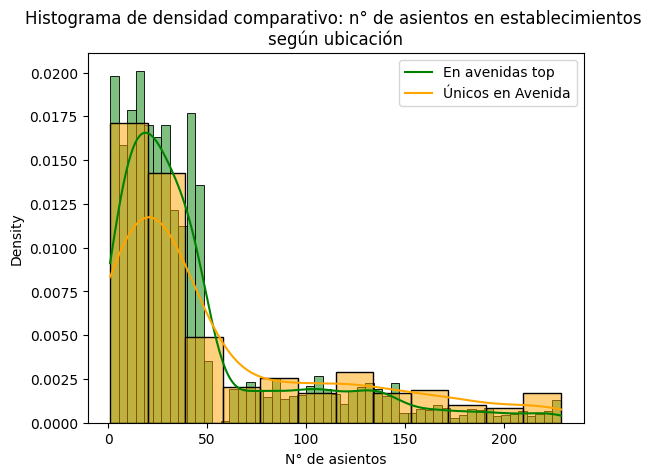

In [58]:
# Crear el histograma superpuesto
sns.histplot(df_top_streets, color='green', x=df_top_streets['number'], kde=True, alpha=0.5, legend=True, stat='density')
sns.histplot(street_df, color='orange', x=street_df['number'], kde=True, alpha=0.5, legend=True, stat='density')
leyenda = ['En avenidas top', 'Únicos en Avenida']

# Añadir leyenda
plt.legend(leyenda)
plt.xlabel('N° de asientos')
plt.title("Histograma de densidad comparativo: n° de asientos en establecimientos \nsegún ubicación")
# Mostrar la gráfica
plt.show()

### Observación histograma de densidad 

- Parecido al histograma donde se compara la distribución de asientos en establecimientos cadena y los que no lo son, se observa un mayor control en la distribución de la cantidad de asientos en los establecimientos que se ubican en las avenidas top 10 más concurridas de L.A., respecto a la distribución de asientos de establecimientos que son únicos en alguna de las 252 calles de L.A.

- La proporción de establecimientos con un rango de 1 a 50 asientos es mayor en los establecimientos que se ubican en las avenidas top 10 más concurridas de L.A.

- La dispersión de asientos en los establecimientos únicos en calles se dispara debido a *bares* y *restaurantes* que no son cadena, cuyo promedio de asientos alcanza **78** y **57**, respectivamente. Muy superiores a los promedios de *bares* y *restaurantes* (no cadena) en avenidas concurridas, los cuales representan **49** y **50** asientos.

## CONCLUSIÓN 

- Tomando en cuenta la naturaleza del proyecto establecimiento regentado por robots en el que se pretende invertir, se recomienda lo siguiente:
    1. Que sea *fast-food*/*cafetería*, establecimientos con mejor promedio de asientos después de restaurantes y bares con 25 y 32 asientos, respectivamente. Sería adecuado que el n° de asientos se encuentre en este rango.
    2. Buscar que el concepto se vuelva parte de una cadena: *cafeterías* y *fast-food* aumentan el promedio de n° de asientos si son parte de una cadena:
        * *Cafe* general: 25 asientos.
        * *Cafe* cadena: 26 asientos.
        * *Fast-food* general: 32.
        * *Fast-food* cadena: 38.
    3. Ubicación: *Hollywood Blvd*. De las avenidas más concurridas en L.A., y con la mayor distribución en número de asientos. Tratándose de de un proyecto ambicioso y caro, es importante buscar maximizar las ganancias exponiendo el negocio a la mayor cantidad de clientes posible.


